In [2]:
from c19analysis import *
import cpnCommonlib as cpn
cpn.setup_figures(plt)

In [3]:
today = pd.to_datetime('07/13/2020')
path = '../'
filename = 'us-counties.csv'
fnamesta = 'us-states.csv'
data=pd.read_csv(path+filename,error_bad_lines=False)
data_st=pd.read_csv(path+fnamesta,error_bad_lines=False)
OH_sur = {'Lorain':39093,'Medina':39103,'Summit':39153,'Portage':39133,'Geauga':39055,'Lake':39085}
our_sur ={'Harford':24025,'Baltimore city':24510,	'Carroll':24013,'Howard':24027,'Anne Arundel':24003,'York':42133,'Montgomery':24031} #York in PA
    

## Total number of cases by state

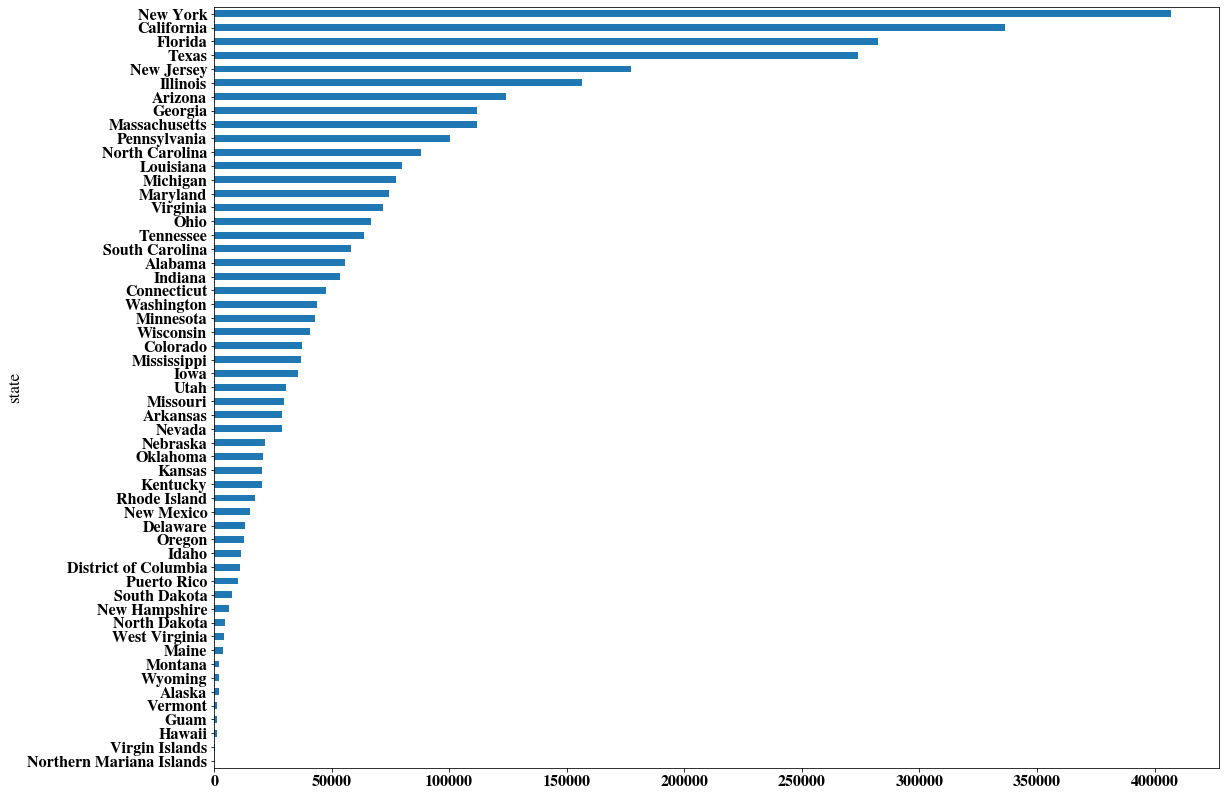

In [4]:
byst_cases=data_st.groupby('date').get_group(today.strftime("%Y-%m-%d")).groupby('state').cases.sum().sort_values()
fig4,ax4=plt.subplots(figsize=(18,14))
byst_cases.plot(kind="barh", ax=ax4)

In [5]:
byst_cases

state
Northern Mariana Islands        33
Virgin Islands                 206
Hawaii                        1222
Guam                          1281
Vermont                       1301
Alaska                        1843
Wyoming                       1903
Montana                       1908
Maine                         3558
West Virginia                 4313
North Dakota                  4446
New Hampshire                 6068
South Dakota                  7524
Puerto Rico                  10010
District of Columbia         10906
Idaho                        11531
Oregon                       12438
Delaware                     12879
New Mexico                   15291
Rhode Island                 17487
Kentucky                     20127
Kansas                       20265
Oklahoma                     20745
Nebraska                     21444
Nevada                       28597
Arkansas                     28939
Missouri                     29781
Utah                         30282
Iowa          

/home/cpnhere/Dropbox/UMBCsem10/covid-19/github/my_work/c19analysis.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['date']=pd.to_datetime(county['date'])
/home/cpnhere/Dropbox/UMBCsem10/covid-19/github/my_work/c19analysis.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['increase']=incr
/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot 

2020-07-13containment_test_top5.png SAVED.


Replace existing file?:  y


Top-5.png SAVED.


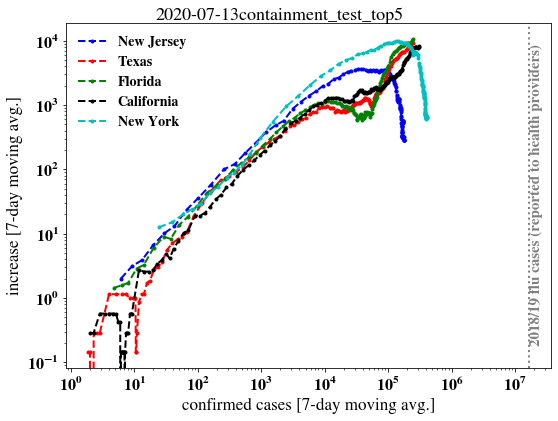

In [6]:
cpn.setup_figures(plt)
top5 = byst_cases.keys()[-5:]
fig4,ax4 = plt.subplots(figsize=(8,6))
fig4_ttl = str(today.date())+"containment_test_top5"
clrs=['b','r','g','k','c']
for sts in np.arange(top5.size):
    confirmed_cases_vs_increase_state(data_st,top5[sts],fig4,ax4,clr=clrs[sts],lns='.--',moving_window=7)
ax4.axvline(16.5e6,ls=':',color='grey')
ax4.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax4.set_xlabel('confirmed cases [7-day moving avg.]')
ax4.set_ylabel('increase [7-day moving avg.]')
ax4.legend()
fig4.suptitle(fig4_ttl)
fig4.tight_layout(rect=[0,0,1,0.98])
fig4.show()
savefig(fig4,fig4_ttl)
savefig(fig4,'Top-5')

## Summit

/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


Replace existing file?: y
2020-07-06_containment_test_Summit_daily.png SAVED.


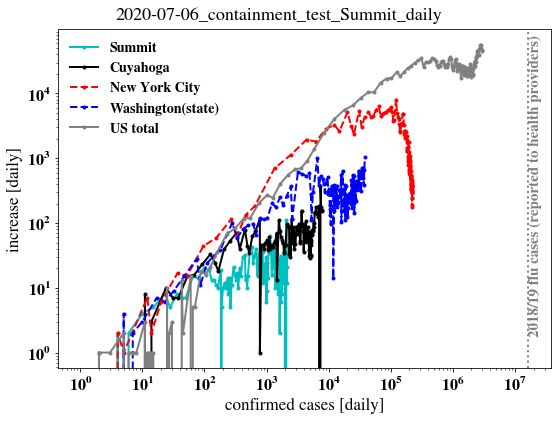

In [19]:
#Containment (Summit)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Summit_daily'
confirmed_cases_vs_increase(data,'Summit',39153,fig3,ax3,clr='c',lns='.-')
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-')
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--')
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--')
confirmed_cases_vs_increase_US(data_st,ax3)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [daily]')
ax3.set_ylabel('increase [daily]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)

/home/cpnhere/Dropbox/UMBCsem10/covid-19/github/my_work/c19analysis.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['date']=pd.to_datetime(county['date'])
/home/cpnhere/Dropbox/UMBCsem10/covid-19/github/my_work/c19analysis.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['increase']=incr
/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot sh

2020-07-13_containment_test_Summit_7day.png SAVED.


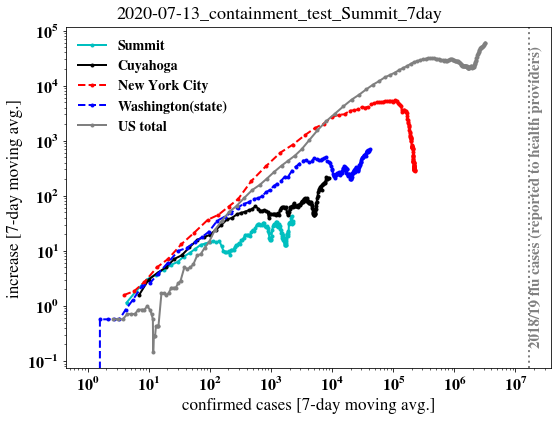

In [7]:
#Containment (Summit)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Summit_7day'
confirmed_cases_vs_increase(data,'Summit',39153,fig3,ax3,clr='c',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--',moving_window=7)
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)

## Baltimore

/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


2020-07-06_containment_test_Baltimore_daily.png SAVED.


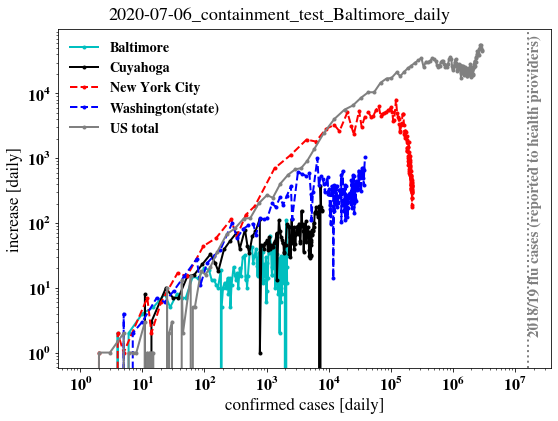

In [21]:
#Containment (Baltimore)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Baltimore_daily'
confirmed_cases_vs_increase(data,'Baltimore',39153,fig3,ax3,clr='c',lns='.-')
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-')
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--')
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--')
confirmed_cases_vs_increase_US(data_st,ax3)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [daily]')
ax3.set_ylabel('increase [daily]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)

/home/cpnhere/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


2020-07-13_containment_test_Baltimore_7day.png SAVED.


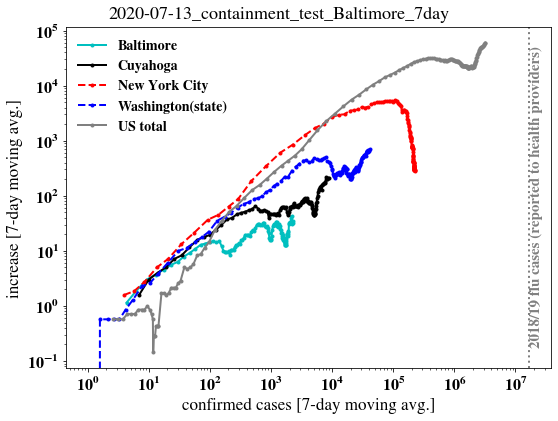

In [8]:
#Containment (Baltimore)
fig3,ax3 = plt.subplots(figsize=(8,6))
fig3_ttl = str(today.date())+'_containment_test_Baltimore_7day'
confirmed_cases_vs_increase(data,'Baltimore',39153,fig3,ax3,clr='c',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'Cuyahoga',39035,fig3,ax3,clr='k',lns='.-',moving_window=7)
confirmed_cases_vs_increase(data,'New York City',np.nan,fig3,ax3,clr='r',lns='.--',moving_window=7)
confirmed_cases_vs_increase_state(data_st,'Washington',fig3,ax3,clr='b',lns='.--',moving_window=7)
confirmed_cases_vs_increase_US(data_st,ax3,moving_window=7)
ax3.axvline(16.5e6,ls=':',color='grey')
ax3.annotate('2018/19 flu cases (reported to health providers)',xy=(17e6,0.2),color='grey',rotation=90)
ax3.set_xlabel('confirmed cases [7-day moving avg.]')
ax3.set_ylabel('increase [7-day moving avg.]')
ax3.legend()
fig3.suptitle(fig3_ttl)
fig3.tight_layout(rect=[0,0,1,0.98])
fig3.show()
savefig(fig3,fig3_ttl)